In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('spam.csv', encoding = 'ISO-8859-1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [7]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.rename(columns = {'v1' : 'target', 'v2' : 'text'}, inplace = True)

In [9]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# using label encoder to convert spam/ham into numeric 1/0

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [11]:
df['target'] = encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
df.duplicated().sum()

403

In [15]:
df = df.drop_duplicates(keep = 'first')

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape

(5169, 2)

## EDA

In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
df['target'].value_counts(normalize = True)*100

0    87.366996
1    12.633004
Name: target, dtype: float64

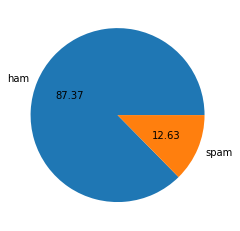

In [20]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = '%0.2f')
plt.show()

In [21]:
# from above distribution it is evident that the data is imbalanced
# now for further steps we will analyze how many letters, words and sentences are there in the text

import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# num of characters 

df['num_characters'] = df['text'].apply(len)
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
# num of words

df['num_words'] = df['text'].apply(lambda x : len(nltk.word_tokenize(x)))
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
# num of sentences

df['num_sentences'] = df['text'].apply(lambda x : len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.453279,1.947185
std,0.332253,58.236293,13.324793,1.362406
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,28.000000


In [26]:
# ham analysis

df.loc[df['target'] == 0, ['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
# spam analysis

df.loc[df['target'] == 1, ['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [28]:
import seaborn as sns

<AxesSubplot:ylabel='Count'>

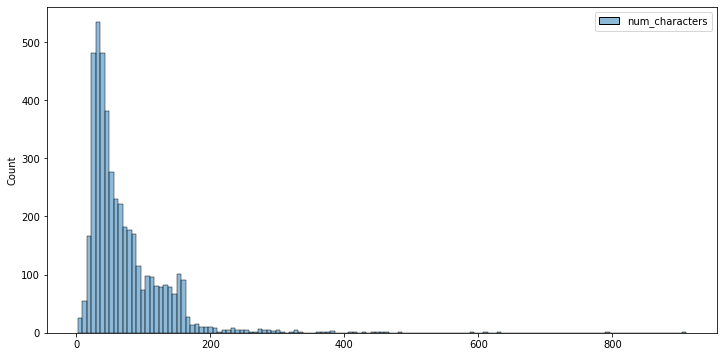

In [29]:
plt.figure(figsize = (12,6))

sns.histplot(df.loc[df['target'] == 0, ['num_characters']])
# sns.histplot(df.loc[df['target'] == 1, ['num_characters']], color = 'red')

<AxesSubplot:ylabel='Count'>

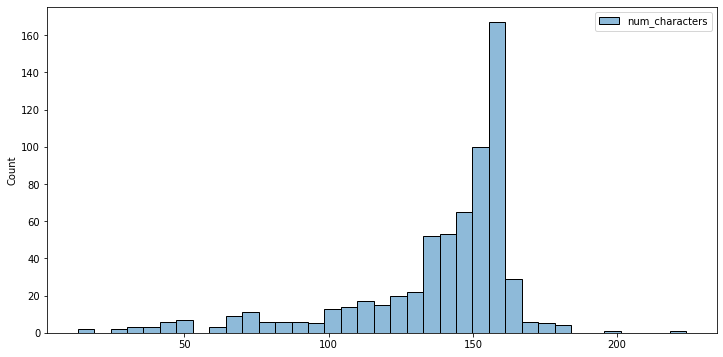

In [30]:
plt.figure(figsize = (12,6))

sns.histplot(df.loc[df['target'] == 1, ['num_characters']], color = 'red')

<AxesSubplot:ylabel='Count'>

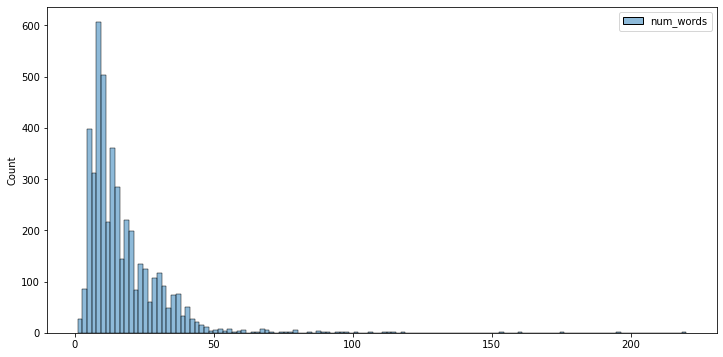

In [31]:
plt.figure(figsize = (12,6))

sns.histplot(df.loc[df['target'] == 0, ['num_words']])

<AxesSubplot:ylabel='Count'>

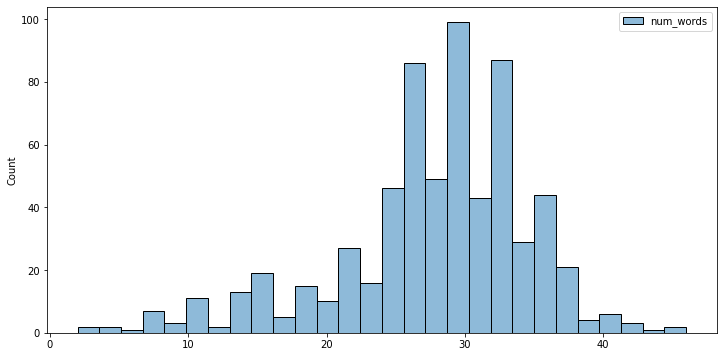

In [32]:
plt.figure(figsize = (12,6))

sns.histplot(df.loc[df['target'] == 1, ['num_words']], color = 'red')

<AxesSubplot:ylabel='Count'>

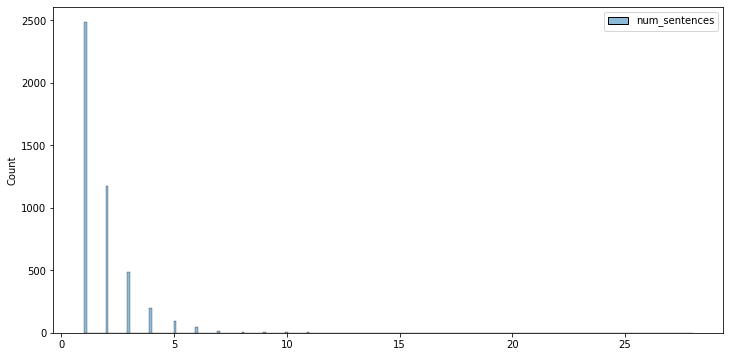

In [33]:
plt.figure(figsize = (12,6))

sns.histplot(df.loc[df['target'] == 0, ['num_sentences']])

<AxesSubplot:ylabel='Count'>

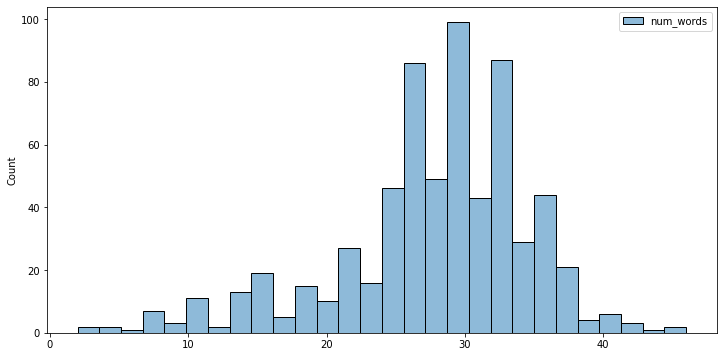

In [34]:
plt.figure(figsize = (12,6))

sns.histplot(df.loc[df['target'] == 1, ['num_words']], color = 'red')

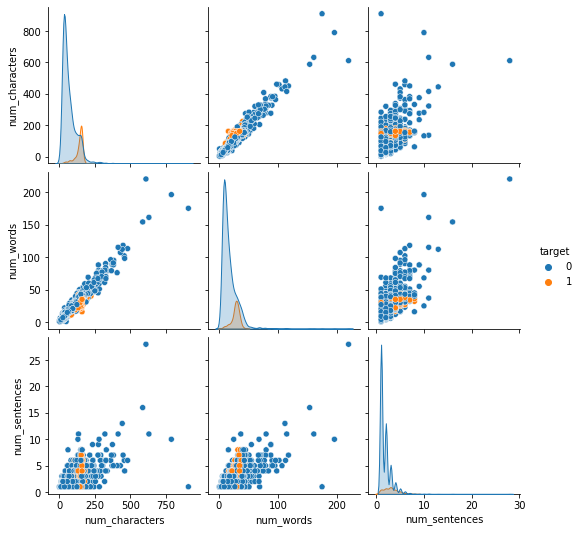

In [35]:
sns.pairplot(df, hue = 'target')

In [36]:
df.corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262984,0.284901
num_characters,0.384717,1.000000,0.965770,0.638143
num_words,0.262984,0.965770,1.000000,0.684541
num_sentences,0.284901,0.638143,0.684541,1.000000


<AxesSubplot:>

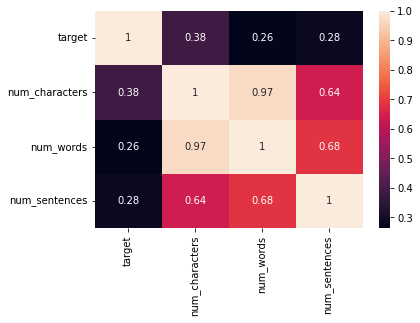

In [37]:
sns.heatmap(df.corr(), annot = True)

# this depicts that num_characters, num_words, num_sentences are highly correlated with each other
# so we will keep any one among the three
# we will use num_characters since it is having highest value of correlation with the target

## Data Preprocessing

In [38]:
# since we are dealing with text data here, the main preprocessing steps would be :
# --> lower case
# --> tokenization
# --> removing special characters
# --> removing stop words and punctuation
# --> stemming

In [39]:
from nltk.corpus import stopwords
nltk.download('stopwords')

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

import string


def transform_text(text):
    text = text.lower()                 # lower case
    text = nltk.word_tokenize(text)     # word tokenize
    
    y = []                              # removing special characters
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]                         # removing stop words and punctuation
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]                         # stemming
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    
    
    return ' '.join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [40]:
transform_text('I am loving the process of learning ML')

'love process learn ml'

In [41]:
df['transformed_text'] = df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
# creating word cloud of spam and ham messages

from wordcloud import WordCloud

wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

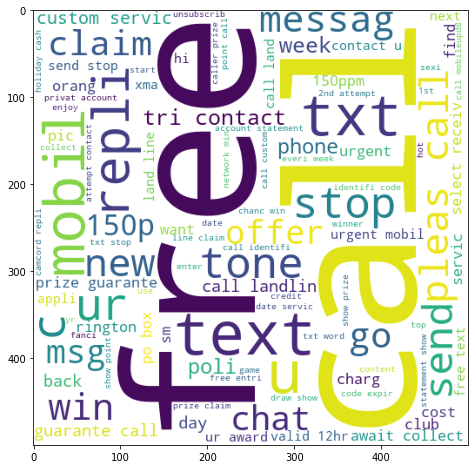

In [44]:
spam_wc = wc.generate(df.loc[df['target'] == 1]['transformed_text'].str.cat(sep = ' '))

plt.figure(figsize = (16,8))
plt.imshow(spam_wc)

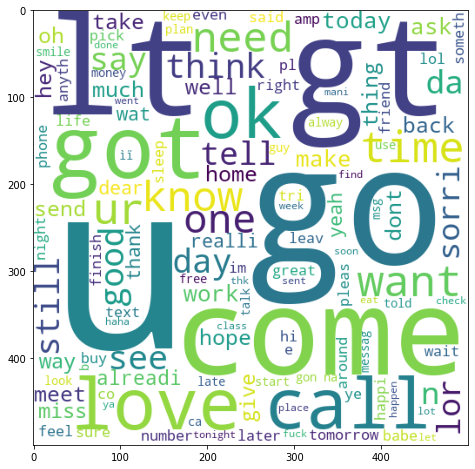

In [45]:
ham_wc = wc.generate(df.loc[df['target'] == 0]['transformed_text'].str.cat(sep = ' '))

plt.figure(figsize = (16,8))
plt.imshow(ham_wc)

In [46]:
# finding the top 30 words in both spam/ham messages

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [47]:
len(spam_corpus)

9939

In [48]:
from collections import Counter

Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


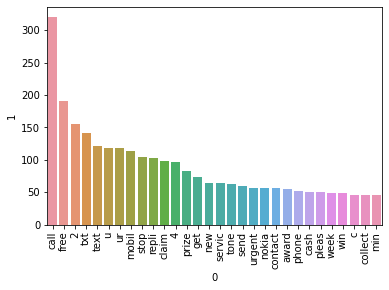

In [49]:
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [50]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
Counter(ham_corpus).most_common(30)

[('u', 883),
 ('go', 404),
 ('get', 349),
 ('gt', 288),
 ('lt', 287),
 ('2', 284),
 ('come', 275),
 ('got', 236),
 ('know', 236),
 ('like', 234),
 ('call', 233),
 ('time', 219),
 ('ok', 217),
 ('love', 216),
 ('good', 213),
 ('want', 208),
 ('ur', 197),
 ('day', 190),
 ('need', 170),
 ('one', 165),
 ('lor', 159),
 ('4', 156),
 ('home', 152),
 ('think', 149),
 ('see', 147),
 ('take', 143),
 ('still', 143),
 ('da', 138),
 ('tell', 133),
 ('make', 129)]

C:\Users\dell\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


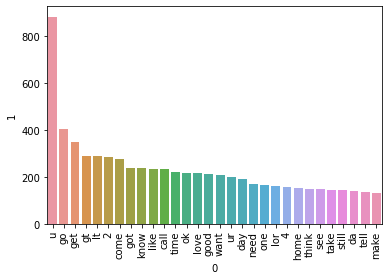

In [52]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

## Model Building

In [53]:
# we will start with Naive Bayes model as it performs well with textual data
# to build the model we need to provide numeric input to the model
# the only input in our case is textual data ('transformed_text')
# we will need to vectorize the textual input in order to feed into the model
# we will use bag of words here to vectorize the data
# finding the most frequently occuring words across all data and then counting the no of occurance of those words in each data point 

In [54]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()

In [55]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [56]:
X.shape

(5169, 6708)

In [57]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [58]:
Y = df['target'].values

In [59]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [62]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [63]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print('Accuracy Score : ', accuracy_score(Y_test, Y_pred1))
print('Confusion Matrix :\n', confusion_matrix(Y_test, Y_pred1))
print('Precision Score : ', precision_score(Y_test, Y_pred1))

Accuracy Score :  0.8800773694390716
Confusion Matrix :
 [[792 104]
 [ 20 118]]
Precision Score :  0.5315315315315315


In [64]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print('Accuracy Score : ', accuracy_score(Y_test, Y_pred2))
print('Confusion Matrix :\n', confusion_matrix(Y_test, Y_pred2))
print('Precision Score : ', precision_score(Y_test, Y_pred2))

Accuracy Score :  0.9642166344294004
Confusion Matrix :
 [[871  25]
 [ 12 126]]
Precision Score :  0.8344370860927153


In [65]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print('Accuracy Score : ', accuracy_score(Y_test, Y_pred3))
print('Confusion Matrix :\n', confusion_matrix(Y_test, Y_pred3))
print('Precision Score : ', precision_score(Y_test, Y_pred3))

Accuracy Score :  0.9700193423597679
Confusion Matrix :
 [[893   3]
 [ 28 110]]
Precision Score :  0.9734513274336283


In [66]:
# using tfidfvectorizer

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features = 3000)             ## NOTE : initially we didnt put max_features arguement value

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5169, 3000)

In [68]:
Y = df['target'].values

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [70]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [71]:
gnb.fit(X_train, Y_train)
Y_pred1 = gnb.predict(X_test)
print('Accuracy Score : ', accuracy_score(Y_test, Y_pred1))
print('Confusion Matrix :\n', confusion_matrix(Y_test, Y_pred1))
print('Precision Score : ', precision_score(Y_test, Y_pred1))

Accuracy Score :  0.8694390715667312
Confusion Matrix :
 [[788 108]
 [ 27 111]]
Precision Score :  0.5068493150684932


In [72]:
mnb.fit(X_train, Y_train)
Y_pred2 = mnb.predict(X_test)
print('Accuracy Score : ', accuracy_score(Y_test, Y_pred2))
print('Confusion Matrix :\n', confusion_matrix(Y_test, Y_pred2))
print('Precision Score : ', precision_score(Y_test, Y_pred2))

Accuracy Score :  0.9709864603481625
Confusion Matrix :
 [[896   0]
 [ 30 108]]
Precision Score :  1.0


In [73]:
bnb.fit(X_train, Y_train)
Y_pred3 = bnb.predict(X_test)
print('Accuracy Score : ', accuracy_score(Y_test, Y_pred3))
print('Confusion Matrix :\n', confusion_matrix(Y_test, Y_pred3))
print('Precision Score : ', precision_score(Y_test, Y_pred3))

Accuracy Score :  0.9835589941972921
Confusion Matrix :
 [[895   1]
 [ 16 122]]
Precision Score :  0.991869918699187


In [74]:
# since the data is imbalanced so the precision score matters more than accuracy 
# thus we can move ahead with tfidf vectorizer then multinomial naive bayes model
# now we will compare the result from this model with results of other ML models available

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [76]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [77]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [78]:
def train_classifier(clf, X_train, Y_train, X_test, Y_test):
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    
    return accuracy, precision

In [79]:
train_classifier(svc, X_train, Y_train, X_test, Y_test)

(0.9758220502901354, 0.9747899159663865)

In [80]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
    
    current_accuracy, current_precision = train_classifier(clf, X_train, Y_train, X_test, Y_test)
    
    print("For ", name)
    print("Accuracy - ", current_accuracy)
    print("Precision - ", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9284332688588007
Precision -  0.82
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9748549323017408
Precision -  0.9827586206896551
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9574468085106383
Precision -  0.8671875
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9477756286266924
Precision -  0.92
For  xgb
Accuracy -  0.971953578336557
Precision -  0.943089430894309


In [81]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, 'Precision':precision_scores}).sort_values('Precision', ascending=False)

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [82]:
performance_df1 = pd.melt(performance_df, id_vars = 'Algorithm')

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,NB,Accuracy,0.970986
2,RF,Accuracy,0.974855
3,SVC,Accuracy,0.975822
4,ETC,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,xgb,Accuracy,0.971954
7,AdaBoost,Accuracy,0.960348
8,GBDT,Accuracy,0.947776
9,BgC,Accuracy,0.957447


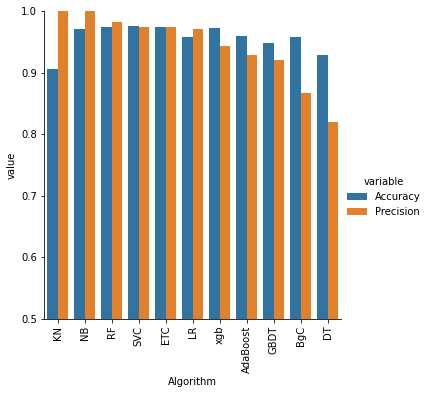

In [83]:
sns.catplot(x = 'Algorithm', y = 'value', hue = 'variable', data = performance_df1, kind = 'bar', height = 5)
plt.ylim(0.5, 1.0)
plt.xticks(rotation= 'vertical')
plt.show()

In [84]:
# after initial results we have done following steps for model improvement :

# 1. Change the max_features parameter of TfIdf to 3000
# 2. Scaling the features didnt help in improving the results hence we will not scale the feature
# 3. adding the extra feature (num_charaters) which we initially created, but it also didnt improved the performance much
# 4. Voting classifier, didnt made significant difference
# 5. Stacking classifier, didnt made significant difference

# Hence we finally approve the naive bayes model for this project

In [85]:
# Voting Classifier

svc = SVC(kernel = 'sigmoid', gamma = 1.0, probability = True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)

from sklearn.ensemble import VotingClassifier

In [86]:
voting = VotingClassifier(estimators = [('svm', svc), ('nb', mnb), ('et', etc)], voting = 'soft')

In [87]:
voting.fit(X_train, Y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [88]:
Y_pred = voting.predict(X_test)
print("Accuracy", accuracy_score(Y_test, Y_pred))
print("Precision", precision_score(Y_test, Y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [89]:
# Stacking Classifier

estimators = [('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator = RandomForestClassifier()

In [90]:
from sklearn.ensemble import StackingClassifier

In [91]:
clf = StackingClassifier(estimators = estimators, final_estimator = final_estimator)

In [92]:
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy", accuracy_score(Y_test, Y_pred))
print("Precision", precision_score(Y_test, Y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [93]:
import pickle

pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))